In [1]:
#2018/ICT/79
import pandas as pd
df=pd.read_csv("advertising.csv")

In [2]:
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [3]:
df=df.drop("Unnamed: 0",axis=1)

In [4]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [10]:
#simple linear regression
X1=df['TV'].values.reshape(-1,1)
y1=df.Sales

In [13]:
#Multiple regression
X2=df.drop('Sales',axis=1)
y2=df.Sales

In [20]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25,random_state=1)
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.25,random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression
slm=LinearRegression()
simple_linear_model=slm.fit(X1_train,y1_train)
mlm=LinearRegression()
multiple_linear_model=mlm.fit(X2_train,y2_train)

In [22]:
print("Intercept for simple linear model:",simple_linear_model.intercept_)
print("Coefficient for simplw linear model:",simple_linear_model.coef_[0])

print("\nIntercept for multiple linear model:",multiple_linear_model.intercept_)
print("Coefficient for multiple linear model:",multiple_linear_model.coef_[0])


Intercept for simple linear model: 6.9119726188687185
Coefficient for simplw linear model: 0.04802945004779218

Intercept for multiple linear model: 2.8769666223179335
Coefficient for multiple linear model: 0.046564567874150295


In [23]:
spredict=simple_linear_model.predict(X1_test)
print(f"Predicted values for simple linear regression: {spredict[:5]}")
print(f"Actual values for simple linear regression: {y1_test[:5].values}")

Predicted values for simple linear regression: [17.03658069 16.63793625 11.50839099 20.36982452 19.10184704]
Actual values for simple linear regression: [23.8 16.6  9.5 14.8 17.6]


In [24]:
mpredict=multiple_linear_model.predict(X2_test)
print(f"Predicted values for multiple linear regression: {mpredict[:5]}")
print(f"Actual values for multiple linear regression: {y2_test[:5].values}")

Predicted values for multiple linear regression: [21.70910292 16.41055243  7.60955058 17.80769552 18.6146359 ]
Actual values for multiple linear regression: [23.8 16.6  9.5 14.8 17.6]


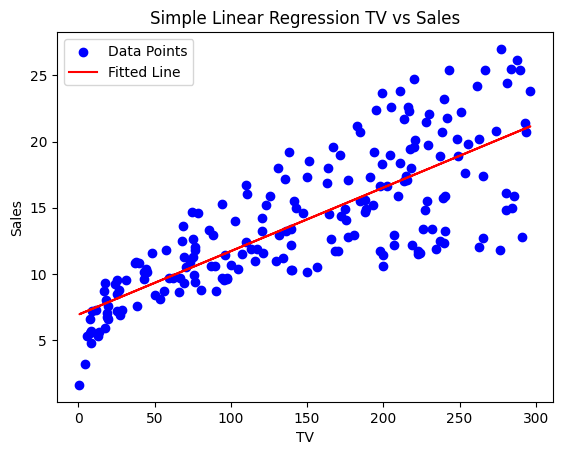

In [26]:
import matplotlib.pyplot as plt
plt.scatter(df['TV'],df['Sales'],color='blue',label='Data Points')
plt.plot(df['TV'],simple_linear_model.coef_[0]*df['TV']+simple_linear_model.intercept_,color='red',label='Fitted Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Simple Linear Regression TV vs Sales')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np

r_squared_s=r2_score(y1_test,spredict)
mae_s=mean_absolute_error(y1_test,spredict)
mse_s=mean_squared_error(y1_test,spredict)
rmse_s=np.sqrt(mse_s)
print("For simple linear regression")
print("R squared:",r_squared_s)
print("Mean absolute error:",mae_s)
print("Mean square error:",mse_s)
print("Root mean square error:",rmse_s)

#multiple linear regression
r_squared_m=r2_score(y2_test,spredict)
mae_m=mean_absolute_error(y2_test,spredict)
mse_m=mean_squared_error(y2_test,spredict)
rmse_m=np.sqrt(mse_s)
print("For multiple linear regression")
print("R squared:",r_squared_m)
print("Mean absolute error:",mae_m)
print("Mean square error:",mse_m)
print("Root mean square error:",rmse_m)

For simple linear regression
R squared: 0.5590828580007852
Mean absolute error: 2.4643080986027908
Mean square error: 10.310069587813155
Root mean square error: 3.210929707703542
For multiple linear regression
R squared: 0.5590828580007852
Mean absolute error: 2.4643080986027908
Mean square error: 10.310069587813155
Root mean square error: 3.210929707703542
